In [48]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# sklearn Regressor Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Data Preparation
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

# import Visualisation library
from tabulate import tabulate

import ta
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings(
    'ignore', 'invalid value encountered in double_scalars')


# Discussion 1: What's the best period (time) for model training?

In [83]:
# Set different start dates
start_dates = ['2012-03-01', '2013-03-01', '2014-03-01',
               '2015-03-01', '2016-03-01', '2017-03-01',
               '2018-03-01', '2019-03-01', '2020-03-01', '2021-03-01']

# Set end date for historical price data
end_date = '2023-03-01'

for i, start_date in enumerate(start_dates):
    # Download historical price data from Yahoo Finance and store in a pandas DataFrame for each start date
    df = yf.download("GOOGL", start=start_date,
                     end=end_date, progress=False)

    # Create a new column for the dependent variable
    df['PriceAfterMonth'] = df['Close'].shift(-20)

    # Remove rows with missing values
    df.dropna(inplace=True)

    # Define the independent and dependent variables
    X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    y = df['PriceAfterMonth']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=30, shuffle=False)

    # Preprocess the data by scaling it
    scaler = MinMaxScaler(feature_range=(0, 1))
    # scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build SVR model
    svr_model = SVR(kernel='linear', C=1000, gamma='auto')
    # Fit the SVR model with a constant term
    X_train_with_const = np.c_[X_train, np.ones(X_train.shape[0])]
    X_test_with_const = np.c_[X_test, np.ones(X_test.shape[0])]
    
    svr_model.fit(X_train_with_const, y_train)

    # # Build RFR model
    rfr_model = RandomForestRegressor(n_estimators=1000, random_state=10)
    rfr_model.fit(X_train, y_train)

    # Test the models and evaluate the performance metrics
    # Calculate evaluation metrics for SVR model
    y_svr_pred_train = svr_model.predict(X_train_with_const)
    r2_svr_train = r2_score(y_train, y_svr_pred_train)
    mse_svr_train = mean_squared_error(y_train, y_svr_pred_train)
    mae_svr_train = mean_absolute_error(y_train, y_svr_pred_train)

    y_svr_pred_test = svr_model.predict(X_test_with_const)
    r2_svr_test = r2_score(y_test, y_svr_pred_test)
    mse_svr_test = mean_squared_error(y_test, y_svr_pred_test)
    mae_svr_test = mean_absolute_error(y_test, y_svr_pred_test)

    # Calculate evaluation metrics for RFR model
    y_rfr_pred_train = rfr_model.predict(X_train)
    r2_rfr_train = r2_score(y_train, y_rfr_pred_train)
    mse_rfr_train = mean_squared_error(y_train, y_rfr_pred_train)
    mae_rfr_train = mean_absolute_error(y_train, y_rfr_pred_train)

    y_rfr_pred_test = rfr_model.predict(X_test)
    r2_rfr_test = r2_score(y_test, y_rfr_pred_test)
    mse_rfr_test = mean_squared_error(y_test, y_rfr_pred_test)
    mae_rfr_test = mean_absolute_error(y_test, y_rfr_pred_test)

    # Create a table to display the evaluation metrics for both SVR and RFR models
    table = [["Model", "R² (Train)", "R² (Test)", "MSE (Train)", "MSE (Test)", "MAE (Train)", "MAE (Test)"],
             ["SVR", r2_svr_train, r2_svr_test, mse_svr_train,
              mse_svr_test, mae_svr_train, mae_svr_test],
             ["RFR", r2_rfr_train, r2_rfr_test, mse_rfr_train, mse_rfr_test, mae_rfr_train, mae_rfr_test]]

    print(start_date)
    print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

2012-03-01
╒═════════╤══════════════╤═════════════╤═══════════════╤══════════════╤═══════════════╤══════════════╕
│ Model   │   R² (Train) │   R² (Test) │   MSE (Train) │   MSE (Test) │   MAE (Train) │   MAE (Test) │
╞═════════╪══════════════╪═════════════╪═══════════════╪══════════════╪═══════════════╪══════════════╡
│ SVR     │     0.969876 │    0.758589 │       9.8651  │      83.9617 │      2.02974  │       7.2571 │
├─────────┼──────────────┼─────────────┼───────────────┼──────────────┼───────────────┼──────────────┤
│ RFR     │     0.99622  │   -2.3415   │       1.23779 │    1162.16   │      0.710384 │      28.7142 │
╘═════════╧══════════════╧═════════════╧═══════════════╧══════════════╧═══════════════╧══════════════╛
2013-03-01
╒═════════╤══════════════╤═════════════╤═══════════════╤══════════════╤═══════════════╤══════════════╕
│ Model   │   R² (Train) │   R² (Test) │   MSE (Train) │   MSE (Test) │   MAE (Train) │   MAE (Test) │
╞═════════╪══════════════╪═════════════╪═══════════

In [87]:
# Set different start dates
start_dates = ['2012-03-01', '2013-03-01', '2014-03-01',
               '2015-03-01', '2016-03-01', '2017-03-01',
               '2018-03-01', '2019-03-01', '2020-03-01', '2021-03-01']

# Set end date for historical price data
end_date = '2023-03-01'

# Set empty lists to store evaluation metrics
r2_svr_train_list = []
r2_svr_test_list = []
mse_svr_train_list = []
mse_svr_test_list = []
mae_svr_train_list = []
mae_svr_test_list = []

r2_rfr_train_list = []
r2_rfr_test_list = []
mse_rfr_train_list = []
mse_rfr_test_list = []
mae_rfr_train_list = []
mae_rfr_test_list = []

for i, start_date in enumerate(start_dates):
    # Download historical price data from Yahoo Finance and store in a pandas DataFrame for each start date
    df = yf.download("GOOGL", start=start_date,
                     end=end_date, progress=False)

    # Create a new column for the dependent variable
    df['PriceAfterMonth'] = df['Close'].shift(-20)

    # Remove rows with missing values
    df.dropna(inplace=True)

    # Define the independent and dependent variables
    X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    y = df['PriceAfterMonth']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=30, shuffle=False)

    # Preprocess the data by scaling it
    scaler = MinMaxScaler(feature_range=(0, 1))
    # scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Build SVR model
    svr_model = SVR(kernel='linear', C=10, gamma='auto')
    # Fit the SVR model with a constant term
    X_train_with_const = np.c_[X_train, np.ones(X_train.shape[0])]
    X_test_with_const = np.c_[X_test, np.ones(X_test.shape[0])]

    svr_model.fit(X_train_with_const, y_train)

    # # Build RFR model
    rfr_model = RandomForestRegressor(n_estimators=100, random_state=10)
    rfr_model.fit(X_train, y_train)

    # Test the models and evaluate the performance metrics
    # Calculate evaluation metrics for SVR model
    y_svr_pred_train = svr_model.predict(X_train_with_const)
    r2_svr_train = r2_score(y_train, y_svr_pred_train)
    mse_svr_train = mean_squared_error(y_train, y_svr_pred_train)
    mae_svr_train = mean_absolute_error(y_train, y_svr_pred_train)

    y_svr_pred_test = svr_model.predict(X_test_with_const)
    r2_svr_test = r2_score(y_test, y_svr_pred_test)
    mse_svr_test = mean_squared_error(y_test, y_svr_pred_test)
    mae_svr_test = mean_absolute_error(y_test, y_svr_pred_test)
    
    r2_svr_train_list.append(r2_svr_train)
    mse_svr_train_list.append(mse_svr_train)
    mae_svr_train_list.append(mae_svr_train)

    r2_svr_test_list.append(r2_svr_test)
    mse_svr_test_list.append(mse_svr_test)
    mae_svr_test_list.append(mae_svr_test)

    # Calculate evaluation metrics for RFR model
    y_rfr_pred_train = rfr_model.predict(X_train)
    r2_rfr_train = r2_score(y_train, y_rfr_pred_train)
    mse_rfr_train = mean_squared_error(y_train, y_rfr_pred_train)
    mae_rfr_train = mean_absolute_error(y_train, y_rfr_pred_train)

    y_rfr_pred_test = rfr_model.predict(X_test)
    r2_rfr_test = r2_score(y_test, y_rfr_pred_test)
    mse_rfr_test = mean_squared_error(y_test, y_rfr_pred_test)
    mae_rfr_test = mean_absolute_error(y_test, y_rfr_pred_test)
    
    r2_rfr_train_list.append(r2_rfr_train)
    mse_rfr_train_list.append(mse_rfr_train)
    mae_rfr_train_list.append(mae_rfr_train)
    r2_rfr_test_list.append(r2_rfr_test)
    mse_rfr_test_list.append(mse_rfr_test)
    mae_rfr_test_list.append(mae_rfr_test)

svr_table = []
for i in range(len(start_dates)):
    year = start_dates[i][:4]
    svr_row = [year, r2_svr_train_list[i], r2_svr_test_list[i], mse_svr_train_list[i],
            mse_svr_test_list[i], mae_svr_train_list[i], mae_svr_test_list[i]]
    svr_table.append(svr_row)

print("SVR Model")
print(tabulate(svr_table, headers=["Year", "R² (Train)", "R² (Test)",
      "MSE (Train)", "MSE (Test)", "MAE (Train)", "MAE (Test)"], tablefmt="fancy_grid"))

rfr_table = []
for i in range(len(start_dates)):
    year = start_dates[i][:4]
    rfr_row = [year, r2_rfr_train_list[i], r2_rfr_test_list[i], mse_rfr_train_list[i],
            mse_rfr_test_list[i], mae_rfr_train_list[i], mae_rfr_test_list[i]]
    rfr_table.append(rfr_row)

print("RFR Model")
print(tabulate(rfr_table, headers=["Year", "R² (Train)", "R² (Test)",
      "MSE (Train)", "MSE (Test)", "MAE (Train)", "MAE (Test)"], tablefmt="fancy_grid"))


SVR Model
╒════════╤══════════════╤═════════════╤═══════════════╤══════════════╤═══════════════╤══════════════╕
│   Year │   R² (Train) │   R² (Test) │   MSE (Train) │   MSE (Test) │   MAE (Train) │   MAE (Test) │
╞════════╪══════════════╪═════════════╪═══════════════╪══════════════╪═══════════════╪══════════════╡
│   2012 │     0.96974  │   0.761045  │        9.9096 │      83.1076 │       2.03668 │      7.16519 │
├────────┼──────────────┼─────────────┼───────────────┼──────────────┼───────────────┼──────────────┤
│   2013 │     0.962801 │   0.715288  │       12.4786 │      92.4188 │       2.28266 │      7.45306 │
├────────┼──────────────┼─────────────┼───────────────┼──────────────┼───────────────┼──────────────┤
│   2014 │     0.962696 │   0.698897  │       14.7285 │     103.957  │       2.53701 │      7.85802 │
├────────┼──────────────┼─────────────┼───────────────┼──────────────┼───────────────┼──────────────┤
│   2015 │     0.965628 │   0.692666  │       16.6443 │     118.246  │  

╒═════════╤═══════════════╤════════════════╤════════════════╕
│ Model   │   R² (Actual) │   MSE (Actual) │   MAE (Actual) │
╞═════════╪═══════════════╪════════════════╪════════════════╡
│ SVR     │      0.586095 │       11.3557  │        2.68407 │
├─────────┼───────────────┼────────────────┼────────────────┤
│ RFR     │      0.811209 │        5.17958 │        1.84096 │
╘═════════╧═══════════════╧════════════════╧════════════════╛


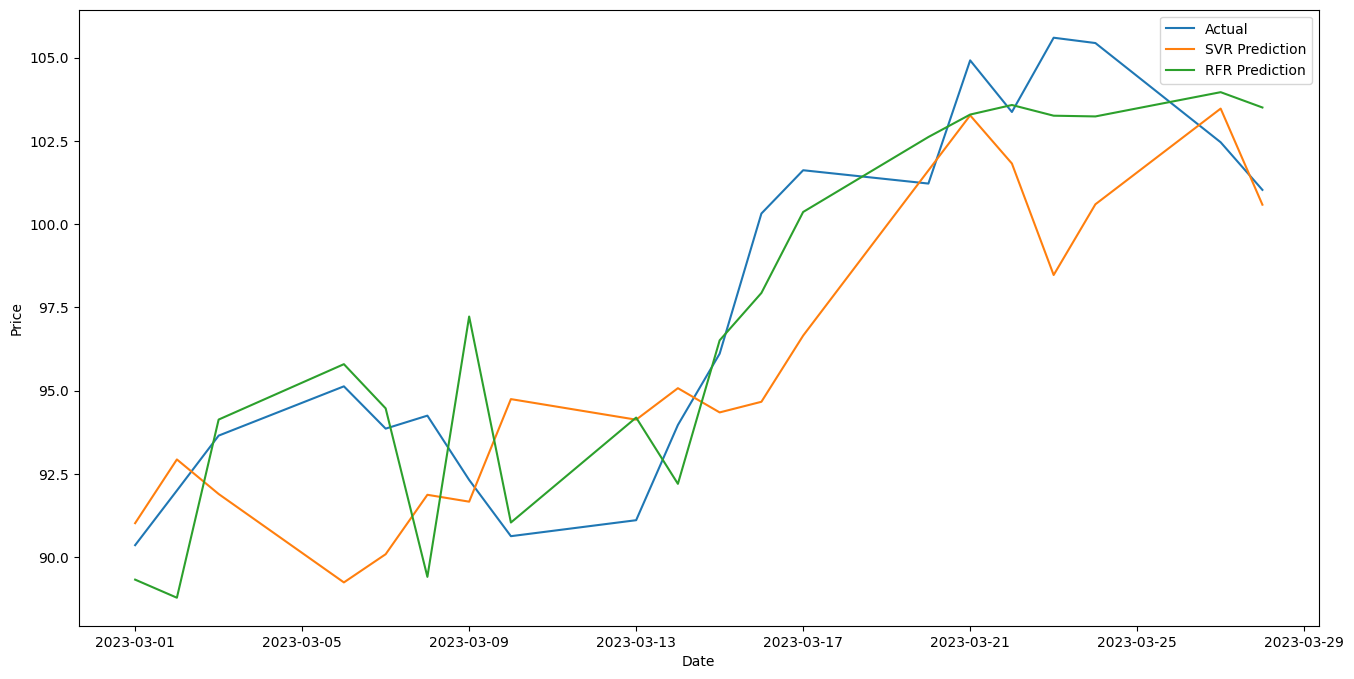

In [82]:
# Download historical price data from Yahoo Finance and store in a pandas DataFrame
df = yf.download("GOOGL", start='2015-03-01', end='2023-03-01', progress=False)

# Create a new column for the dependent variable
df['PriceAfterMonth'] = df['Close'].shift(-20)

# Remove rows with missing values
df.dropna(inplace=True)

# Define the independent and dependent variables
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y = df['PriceAfterMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, shuffle=False)

# Preprocess the data by scaling it
scaler = MinMaxScaler(feature_range=(0, 1))
# scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the SVR model with a constant term
X_train_with_const = np.c_[X_train, np.ones(X_train.shape[0])]
X_test_with_const = np.c_[X_test, np.ones(X_test.shape[0])]

# Build SVR model
svr_model = SVR(kernel='linear', C=1000, gamma='auto')
svr_model.fit(X_train_with_const, y_train)

# # Build RFR model
rfr_model = RandomForestRegressor(n_estimators=1000, random_state=10)
rfr_model.fit(X_train, y_train)

# Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
df_actual = yf.download(
    "GOOGL", start='2023-03-01', end='2023-03-29', progress=False)

# Get the last 30 days of historical data
number_of_days = len(df_actual)
last_n_days = df[-number_of_days:]

last_n_days_df = pd.DataFrame(
    last_n_days, columns=X.columns)

X_pred = scaler.transform(last_n_days_df)
X_pred_with_const = np.c_[X_pred, np.ones(X_pred.shape[0])]

# Make predictions for the next 30 days using the SVR & RFR model
y_svr_pred = svr_model.predict(X_pred_with_const)
y_rfr_pred = rfr_model.predict(X_pred)

# Add the predictions to the actual data in a new DataFrame
df_pred = pd.DataFrame({'SVR Prediction': y_svr_pred,
                        'RFR Prediction': y_rfr_pred}, index=df_actual.index)

df_combined = pd.concat([df_actual, df_pred], axis=1)

# Calculate evaluation metrics for SVR model
r2_svr_actual = r2_score(df_combined['Close'], df_combined['SVR Prediction'])
mse_svr_actual = mean_squared_error(
    df_combined['Close'], df_combined['SVR Prediction'])
mae_svr_actual = mean_absolute_error(
    df_combined['Close'], df_combined['SVR Prediction'])

# Calculate evaluation metrics for RFR model
r2_rfr_actual = r2_score(df_combined['Close'], df_combined['RFR Prediction'])
mse_rfr_actual = mean_squared_error(
    df_combined['Close'], df_combined['RFR Prediction'])
mae_rfr_actual = mean_absolute_error(
    df_combined['Close'], df_combined['RFR Prediction'])

# Create a table to display the evaluation metrics for both SVR and RFR models
table = [["Model", "R² (Actual)", "MSE (Actual)", "MAE (Actual)"],
         ["SVR", r2_svr_actual, mse_svr_actual, mae_svr_actual],
         ["RFR", r2_rfr_actual, mse_rfr_actual, mae_rfr_actual]]
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

# Plot the actual price and the predictions
plt.figure(figsize=(16, 8))
plt.plot(df_combined.index, df_combined['Close'], label='Actual')
plt.plot(df_combined.index,
         df_combined['SVR Prediction'], label='SVR Prediction')
plt.plot(df_combined.index,
         df_combined['RFR Prediction'], label='RFR Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Answer D1 : Based on the comparison table, the best time period is 2015-09-01 until 2023-03-01 according to R2, MSE, MAE score.

# Discussion 2: How's does the model perform in predicting Google Stock Price in March 2023?

In [43]:
# Create lists to store the evaluation metrics for each start date
r2_scores = []
mse_scores = []
mae_scores = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame
df = yf.download("GOOGL", start='2015-03-01', end='2023-03-01', progress=False)

# Create a new column for the dependent variable
df['PriceAfterMonth'] = df['Close'].shift(-20)

# Remove rows with missing values
df.dropna(inplace=True)

# Define the independent and dependent variables
X = df.drop(['PriceAfterMonth'], axis=1)
y = df['PriceAfterMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, shuffle=False)

# Preprocess the data by scaling it
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build SVR model
svr_model = SVR(kernel='linear', C=1000, gamma='auto')
svr_model.fit(X_train, y_train)

# # Build RFR model
rfr_model = RandomForestRegressor(n_estimators=500, random_state=10)
rfr_model.fit(X_train, y_train)

# Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
df_actual = yf.download(
    "GOOGL", start='2023-03-01', end='2023-03-29', progress=False)

# Get the last 30 days of historical data
number_of_days = len(df_actual)
last_n_days = df[-number_of_days:]

# Scale the data using the same scaler object
last_n_days_df = pd.DataFrame(
    last_n_days, columns=X.columns)
X_pred = scaler.transform(last_n_days_df)

# Make predictions for the next 30 days using the SVR & RFR model
y_svr_pred = svr_model.predict(X_pred)
y_rfr_pred = rfr_model.predict(X_pred)

   # Test the models and evaluate the performance metrics
# Calculate evaluation metrics for SVR model
y_svr_pred_train = svr_model.predict(X_train)
r2_svr_train = r2_score(y_train, y_svr_pred_train)
mse_svr_train = mean_squared_error(y_train, y_svr_pred_train)
mae_svr_train = mean_absolute_error(y_train, y_svr_pred_train)

y_svr_pred_test = svr_model.predict(X_test)
r2_svr_test = r2_score(y_test, y_svr_pred_test)
mse_svr_test = mean_squared_error(y_test, y_svr_pred_test)
mae_svr_test = mean_absolute_error(y_test, y_svr_pred_test)

# Calculate evaluation metrics for RFR model
y_rfr_pred_train = rfr_model.predict(X_train)
r2_rfr_train = r2_score(y_train, y_rfr_pred_train)
mse_rfr_train = mean_squared_error(y_train, y_rfr_pred_train)
mae_rfr_train = mean_absolute_error(y_train, y_rfr_pred_train)

y_rfr_pred_test = rfr_model.predict(X_test)
r2_rfr_test = r2_score(y_test, y_rfr_pred_test)
mse_rfr_test = mean_squared_error(y_test, y_rfr_pred_test)
mae_rfr_test = mean_absolute_error(y_test, y_rfr_pred_test)

# axs[row_index][col_index].plot(y_test.to_numpy(), label='Actual')
# axs[row_index][col_index].plot(y_svr_pred_test, label='SVR Prediction')
# axs[row_index][col_index].plot(y_rfr_pred_test, label='RFR Prediction')
# axs[row_index][col_index].set_title(
#     f"Google Stock Price Prediction ({start_date} - {end_date})")
# axs[row_index][col_index].set_xlabel('Day')
# axs[row_index][col_index].set_ylabel('Price')
# axs[row_index][col_index].legend()

# Create a table to display the evaluation metrics for both SVR and RFR models
table = [["Model", "R² (Train)", "R² (Test)", "MSE (Train)", "MSE (Test)", "MAE (Train)", "MAE (Test)"],
         ["SVR", r2_svr_train, r2_svr_test, mse_svr_train,
          mse_svr_test, mae_svr_train, mae_svr_test],
         ["RFR", r2_rfr_train, r2_rfr_test, mse_rfr_train, mse_rfr_test, mae_rfr_train, mae_rfr_test]]

print(start_date)
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the figure
plt.show()


2021-03-01
╒═════════╤══════════════╤═════════════╤═══════════════╤══════════════╤═══════════════╤══════════════╕
│ Model   │   R² (Train) │   R² (Test) │   MSE (Train) │   MSE (Test) │   MAE (Train) │   MAE (Test) │
╞═════════╪══════════════╪═════════════╪═══════════════╪══════════════╪═══════════════╪══════════════╡
│ SVR     │     0.965786 │    0.679146 │      16.568   │      123.448 │      2.73744  │      8.88449 │
├─────────┼──────────────┼─────────────┼───────────────┼──────────────┼───────────────┼──────────────┤
│ RFR     │     0.995815 │    0.705496 │       2.02677 │      113.31  │      0.967342 │      9.0497  │
╘═════════╧══════════════╧═════════════╧═══════════════╧══════════════╧═══════════════╧══════════════╛


<Figure size 640x480 with 0 Axes>

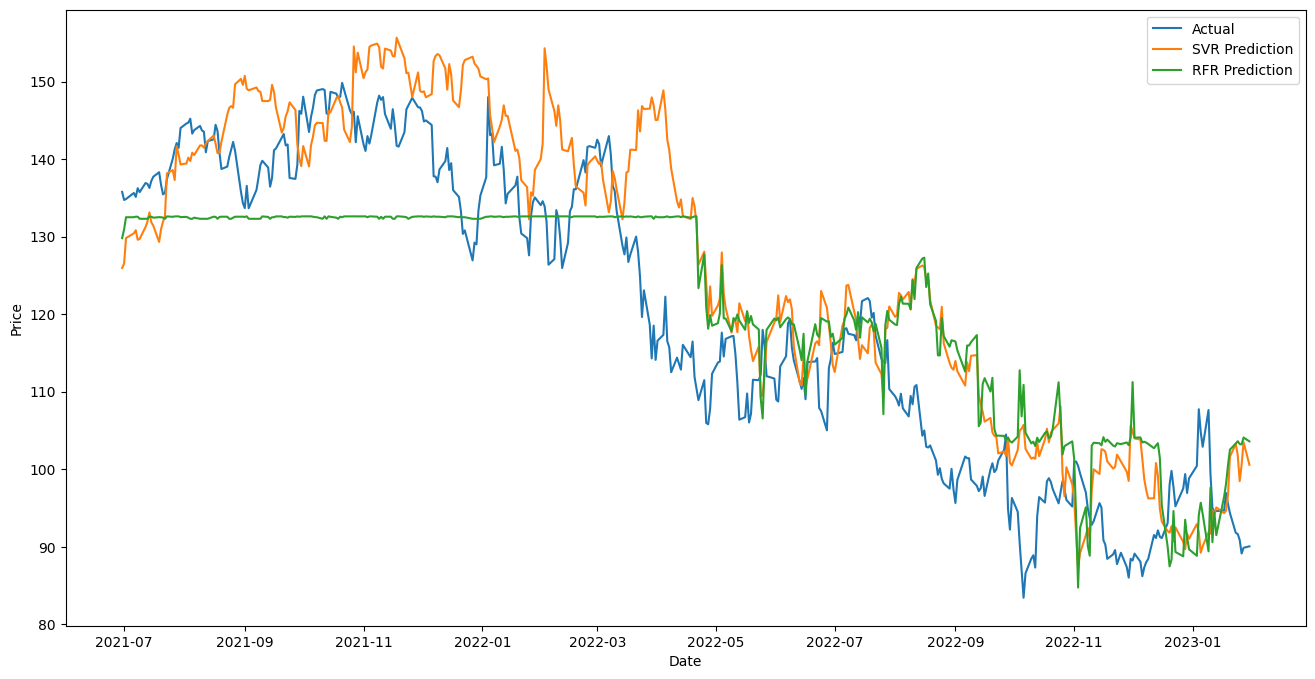

2021-03-01
╒═════════╤══════════════╤═════════════╤═══════════════╤══════════════╤═══════════════╤══════════════╕
│ Model   │   R² (Train) │   R² (Test) │   MSE (Train) │   MSE (Test) │   MAE (Train) │   MAE (Test) │
╞═════════╪══════════════╪═════════════╪═══════════════╪══════════════╪═══════════════╪══════════════╡
│ SVR     │     0.965786 │    0.679146 │      16.568   │      123.448 │      2.73744  │      8.88449 │
├─────────┼──────────────┼─────────────┼───────────────┼──────────────┼───────────────┼──────────────┤
│ RFR     │     0.995815 │    0.705496 │       2.02677 │      113.31  │      0.967342 │      9.0497  │
╘═════════╧══════════════╧═════════════╧═══════════════╧══════════════╧═══════════════╧══════════════╛


In [46]:
# Create lists to store the evaluation metrics for each start date
r2_scores = []
mse_scores = []
mae_scores = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame
df = yf.download("GOOGL", start='2015-03-01', end='2023-03-01', progress=False)

# Create a new column for the dependent variable
df['PriceAfterMonth'] = df['Close'].shift(-20)

# Remove rows with missing values
df.dropna(inplace=True)

# Define the independent and dependent variables
X = df.drop(['PriceAfterMonth'], axis=1)
y = df['PriceAfterMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, shuffle=False)

# Preprocess the data by scaling it
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build SVR model
svr_model = SVR(kernel='linear', C=1000, gamma='auto')
svr_model.fit(X_train, y_train)

# # Build RFR model
rfr_model = RandomForestRegressor(n_estimators=500, random_state=10)
rfr_model.fit(X_train, y_train)

# Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
df_actual = yf.download(
    "GOOGL", start='2023-03-01', end='2023-03-29', progress=False)

# Get the last 30 days of historical data
number_of_days = len(df_actual)
last_n_days = df[-number_of_days:]

# Scale the data using the same scaler object
last_n_days_df = pd.DataFrame(
    last_n_days, columns=X.columns)
X_pred = scaler.transform(last_n_days_df)

# Make predictions for the next 30 days using the SVR & RFR model
y_svr_pred = svr_model.predict(X_pred)
y_rfr_pred = rfr_model.predict(X_pred)

# Test the models and evaluate the performance metrics
# Calculate evaluation metrics for SVR model
y_svr_pred_train = svr_model.predict(X_train)
r2_svr_train = r2_score(y_train, y_svr_pred_train)
mse_svr_train = mean_squared_error(y_train, y_svr_pred_train)
mae_svr_train = mean_absolute_error(y_train, y_svr_pred_train)

y_svr_pred_test = svr_model.predict(X_test)
r2_svr_test = r2_score(y_test, y_svr_pred_test)
mse_svr_test = mean_squared_error(y_test, y_svr_pred_test)
mae_svr_test = mean_absolute_error(y_test, y_svr_pred_test)

# Calculate evaluation metrics for RFR model
y_rfr_pred_train = rfr_model.predict(X_train)
r2_rfr_train = r2_score(y_train, y_rfr_pred_train)
mse_rfr_train = mean_squared_error(y_train, y_rfr_pred_train)
mae_rfr_train = mean_absolute_error(y_train, y_rfr_pred_train)

y_rfr_pred_test = rfr_model.predict(X_test)
r2_rfr_test = r2_score(y_test, y_rfr_pred_test)
mse_rfr_test = mean_squared_error(y_test, y_rfr_pred_test)
mae_rfr_test = mean_absolute_error(y_test, y_rfr_pred_test)


# Plot the actual price and the predictions
plt.figure(figsize=(16, 8))
plt.plot(y_test.index, y_test.to_numpy(), label='Actual')
plt.plot(y_test.index,
         y_svr_pred_test, label='SVR Prediction')
plt.plot(y_test.index,
         y_rfr_pred_test, label='RFR Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Create a table to display the evaluation metrics for both SVR and RFR models
table = [["Model", "R² (Train)", "R² (Test)", "MSE (Train)", "MSE (Test)", "MAE (Train)", "MAE (Test)"],
         ["SVR", r2_svr_train, r2_svr_test, mse_svr_train,
          mse_svr_test, mae_svr_train, mae_svr_test],
         ["RFR", r2_rfr_train, r2_rfr_test, mse_rfr_train, mse_rfr_test, mae_rfr_train, mae_rfr_test]]

print(start_date)
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

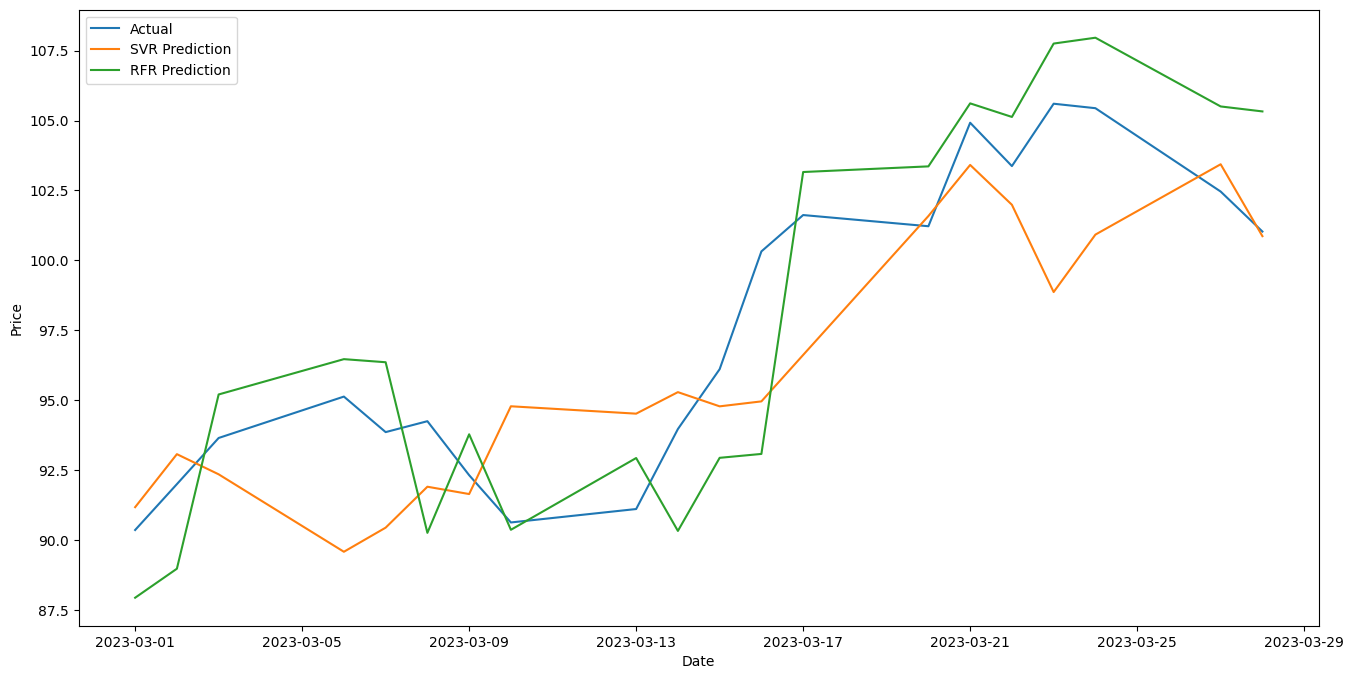

╒═════════╤═══════════════╤════════════════╤════════════════╕
│ Model   │   R² (Actual) │   MSE (Actual) │   MAE (Actual) │
╞═════════╪═══════════════╪════════════════╪════════════════╡
│ SVR     │      0.618946 │       10.4544  │        2.56951 │
├─────────┼───────────────┼────────────────┼────────────────┤
│ RFR     │      0.686845 │        8.59157 │        2.52809 │
╘═════════╧═══════════════╧════════════════╧════════════════╛


In [47]:
# Create lists to store the evaluation metrics for each start date
r2_scores = []
mse_scores = []
mae_scores = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame
df = yf.download("GOOGL", start='2016-03-01', end='2023-03-01', progress=False)

# Create a new column for the dependent variable
df['PriceAfterMonth'] = df['Close'].shift(-20)

# Remove rows with missing values
df.dropna(inplace=True)

# Define the independent and dependent variables
X = df.drop(['PriceAfterMonth'], axis=1)
y = df['PriceAfterMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, shuffle=False)

# Preprocess the data by scaling it
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the PCA model:
pca_model = PCA(n_components=5)

# Fit the PCA model to the training data:
pca_model.fit(X_train)

# Transform the training and test data using the fitted PCA model:
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

# Build SVR model
svr_model = SVR(kernel='linear', C=1000, gamma='auto')
svr_model.fit(X_train_pca, y_train)

# # Build RFR model
rfr_model = RandomForestRegressor(n_estimators=500, random_state=10)
rfr_model.fit(X_train_pca, y_train)

# Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
df_actual = yf.download(
    "GOOGL", start='2023-03-01', end='2023-03-29', progress=False)

# Get the last 30 days of historical data
number_of_days = len(df_actual)
last_n_days = df[-number_of_days:]

# Scale the data using the same scaler object
last_n_days_df = pd.DataFrame(
    last_n_days, columns=X.columns)
X_pred = scaler.transform(last_n_days_df)
X_pred_pca = pca_model.transform(X_pred)

# Make predictions for the next 30 days using the SVR & RFR model
y_svr_pred = svr_model.predict(X_pred_pca)
y_rfr_pred = rfr_model.predict(X_pred_pca)

# Add the predictions to the actual data in a new DataFrame
df_pred = pd.DataFrame({'SVR Prediction': y_svr_pred,
                        'RFR Prediction': y_rfr_pred}, index=df_actual.index)

df_combined = pd.concat([df_actual, df_pred], axis=1)

# Plot the actual price and the predictions
plt.figure(figsize=(16, 8))
plt.plot(df_combined.index, df_combined['Close'], label='Actual')
plt.plot(df_combined.index,
         df_combined['SVR Prediction'], label='SVR Prediction')
plt.plot(df_combined.index,
         df_combined['RFR Prediction'], label='RFR Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate evaluation metrics for SVR model
r2_svr_actual = r2_score(df_combined['Close'], y_svr_pred)
mse_svr_actual = mean_squared_error(df_combined['Close'], y_svr_pred)
mae_svr_actual = mean_absolute_error(df_combined['Close'], y_svr_pred)

# Calculate evaluation metrics for RFR model
r2_rfr_actual = r2_score(df_combined['Close'], y_rfr_pred)
mse_rfr_actual = mean_squared_error(df_combined['Close'], y_rfr_pred)
mae_rfr_actual = mean_absolute_error(df_combined['Close'], y_rfr_pred)

# Create a table to display the evaluation metrics for both SVR and RFR models
table = [["Model", "R² (Actual)", "MSE (Actual)", "MAE (Actual)"],
         ["SVR", r2_svr_actual, mse_svr_actual, mae_svr_actual],
         ["RFR", r2_rfr_actual, mse_rfr_actual, mae_rfr_actual]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


Ans D2: Based on the observation, the model still cannot perform well prediction in the actual real time. R2 is negative.

Discussion 3: Apply Feature Engineering

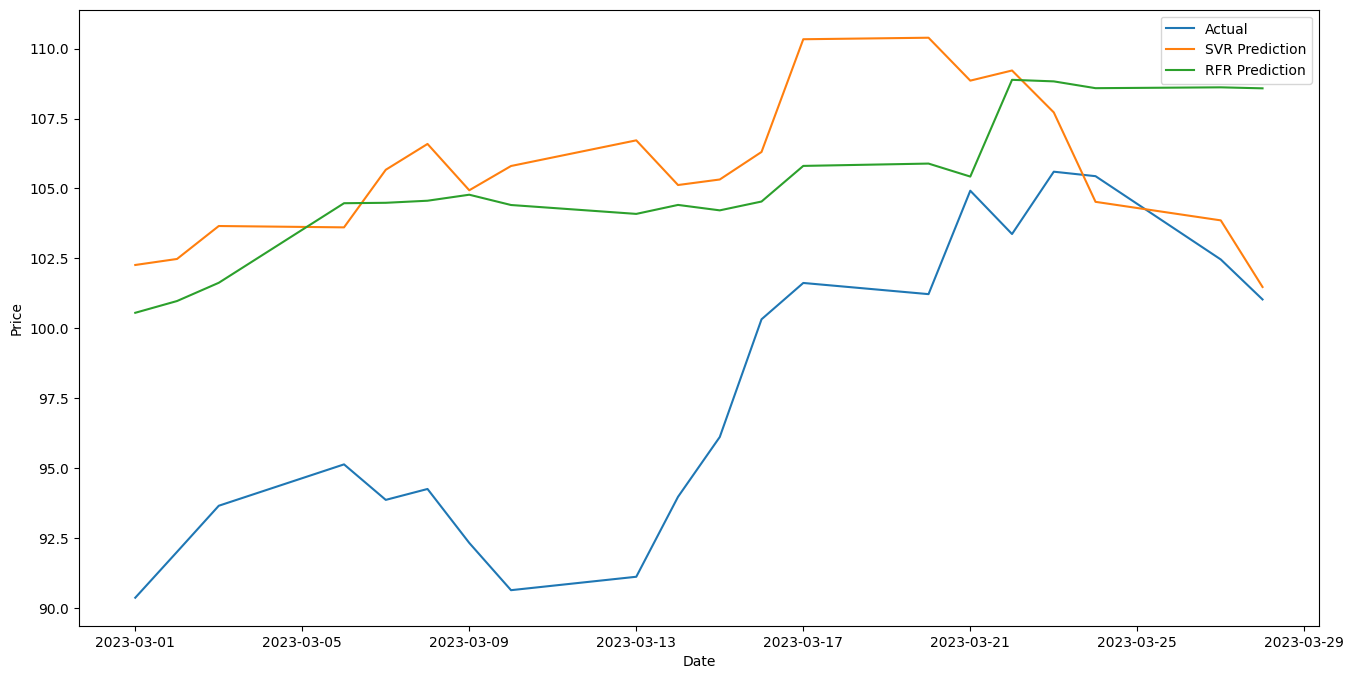

╒═════════╤═══════════════╤════════════════╤════════════════╕
│ Model   │   R² (Actual) │   MSE (Actual) │   MAE (Actual) │
╞═════════╪═══════════════╪════════════════╪════════════════╡
│ SVR     │      -2.30027 │        90.5447 │        8.36668 │
├─────────┼───────────────┼────────────────┼────────────────┤
│ RFR     │      -1.63514 │        72.2963 │        7.71849 │
╘═════════╧═══════════════╧════════════════╧════════════════╛


In [29]:
import ta

# Create lists to store the evaluation metrics for each start date
r2_scores = []
mse_scores = []
mae_scores = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame
df = yf.download("GOOGL", start='2016-03-01', end='2023-03-01', progress=False)

# Add technical indicators
df = ta.add_all_ta_features(
    df, "Open", "High", "Low", "Close", "Volume", fillna=True)

# Create a new column for the dependent variable
df['PriceAfterMonth'] = df['Close'].shift(-10)

# Remove rows with missing values
df.dropna(inplace=True)

# Define the independent and dependent variables
X = df.drop(['PriceAfterMonth'], axis=1)
y = df['PriceAfterMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, shuffle=False)

# Preprocess the data by scaling it
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build SVR model
svr_model = SVR(kernel='linear', C=1000, gamma='auto')
svr_model.fit(X_train, y_train)

# Build RFR model
rfr_model = RandomForestRegressor(n_estimators=500, random_state=10)
rfr_model.fit(X_train, y_train)

# Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
df_actual = yf.download(
    "GOOGL", start='2023-03-01', end='2023-03-29', progress=False)

# Get the last 30 days of historical data
number_of_days = len(df_actual)
last_n_days = df[-number_of_days:]

last_n_days_df = pd.DataFrame(
    last_n_days, columns=X.columns)
X_pred = scaler.transform(last_n_days_df)

# Make predictions for the next 30 days using the SVR & RFR model
y_svr_pred = svr_model.predict(X_pred)
y_rfr_pred = rfr_model.predict(X_pred)

# Add the predictions to the actual data in a new DataFrame
df_pred = pd.DataFrame({'SVR Prediction': y_svr_pred,
                        'RFR Prediction': y_rfr_pred}, index=df_actual.index)

df_combined = pd.concat([df_actual, df_pred], axis=1)

# Plot the actual price and the predictions
plt.figure(figsize=(16, 8))
plt.plot(df_combined.index, df_combined['Close'], label='Actual')
plt.plot(df_combined.index,
         df_combined['SVR Prediction'], label='SVR Prediction')
plt.plot(df_combined.index,
         df_combined['RFR Prediction'], label='RFR Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate evaluation metrics for SVR model
r2_svr_actual = r2_score(df_combined['Close'], y_svr_pred)
mse_svr_actual = mean_squared_error(df_combined['Close'], y_svr_pred)
mae_svr_actual = mean_absolute_error(df_combined['Close'], y_svr_pred)

# Calculate evaluation metrics for RFR model
r2_rfr_actual = r2_score(df_combined['Close'], y_rfr_pred)
mse_rfr_actual = mean_squared_error(df_combined['Close'], y_rfr_pred)
mae_rfr_actual = mean_absolute_error(df_combined['Close'], y_rfr_pred)

# Create a table to display the evaluation metrics for both SVR and RFR models
table = [["Model", "R² (Actual)", "MSE (Actual)", "MAE (Actual)"],
         ["SVR", r2_svr_actual, mse_svr_actual, mae_svr_actual],
         ["RFR", r2_rfr_actual, mse_rfr_actual, mae_rfr_actual]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

By adding more technical indicators, the model perform worse. Thus, a feature selection will be performed next.

In [16]:
importances = rfr_model.feature_importances_
feature_importances = [(feature, importance)
                       for feature, importance in zip(X.columns, importances)]
feature_importances = sorted(
    feature_importances, key=lambda x: x[1], reverse=True)
print("Top 10 Features:")
for feature, importance in feature_importances[:5]:
    print("{}: {}".format(feature, importance))


Top 10 Features:
volume_obv: 0.5568659115739854
trend_visual_ichimoku_b: 0.13187864496312715
High: 0.03764767195687336
trend_ema_slow: 0.024672765448186064
Low: 0.024379846885215804


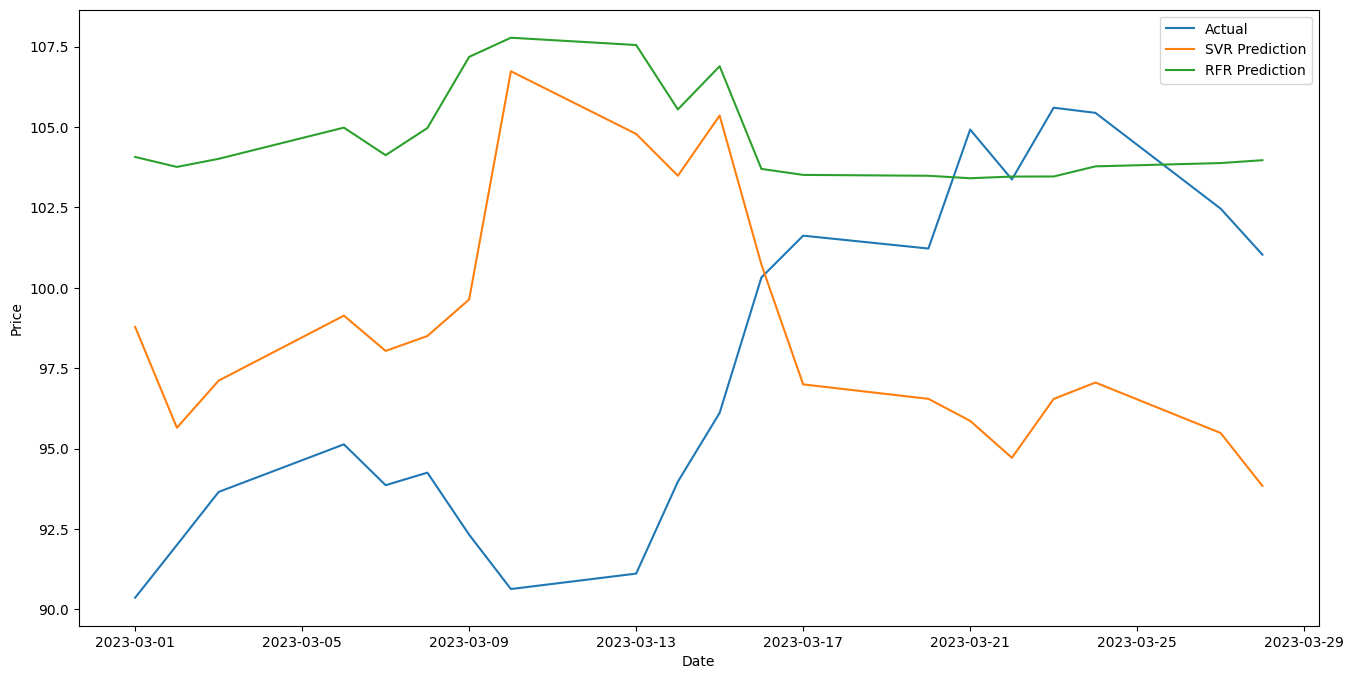

╒═════════╤═══════════════╤════════════════╤════════════════╕
│ Model   │   R² (Actual) │   MSE (Actual) │   MAE (Actual) │
╞═════════╪═══════════════╪════════════════╪════════════════╡
│ SVR     │      -1.32703 │        63.8432 │        7.14249 │
├─────────┼───────────────┼────────────────┼────────────────┤
│ RFR     │      -2.3286  │        91.3219 │        7.73759 │
╘═════════╧═══════════════╧════════════════╧════════════════╛


In [17]:
import ta

# Create lists to store the evaluation metrics for each start date
r2_scores = []
mse_scores = []
mae_scores = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame
df = yf.download("GOOGL", start='2016-03-01', end='2023-03-01', progress=False)

# Add technical indicators
df = ta.add_all_ta_features(
    df, "Open", "High", "Low", "Close", "Volume", fillna=True)

# Create a new column for the dependent variable
df['PriceAfterMonth'] = df['Close'].shift(-5)

# Remove rows with missing values
df.dropna(inplace=True)

# Define the independent and dependent variables
X = df[['volume_obv', 'trend_visual_ichimoku_b', 'High', 'trend_ema_slow', 'Low']]
y = df['PriceAfterMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, shuffle=False)

# Preprocess the data by scaling it
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build SVR model
svr_model = SVR(kernel='linear', C=1000, gamma='auto')
svr_model.fit(X_train, y_train)

# Build RFR model
rfr_model = RandomForestRegressor(n_estimators=500, random_state=10)
rfr_model.fit(X_train, y_train)

# Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
df_actual = yf.download(
    "GOOGL", start='2023-03-01', end='2023-03-29', progress=False)

# Get the last 30 days of historical data
number_of_days = len(df_actual)
last_n_days = df[-number_of_days:]

last_n_days_df = pd.DataFrame(
    last_n_days, columns=X.columns)
X_pred = scaler.transform(last_n_days_df)

# Make predictions for the next 30 days using the SVR & RFR model
y_svr_pred = svr_model.predict(X_pred)
y_rfr_pred = rfr_model.predict(X_pred)

# Add the predictions to the actual data in a new DataFrame
df_pred = pd.DataFrame({'SVR Prediction': y_svr_pred,
                        'RFR Prediction': y_rfr_pred}, index=df_actual.index)

df_combined = pd.concat([df_actual, df_pred], axis=1)

# Plot the actual price and the predictions
plt.figure(figsize=(16, 8))
plt.plot(df_combined.index, df_combined['Close'], label='Actual')
plt.plot(df_combined.index,
         df_combined['SVR Prediction'], label='SVR Prediction')
plt.plot(df_combined.index,
         df_combined['RFR Prediction'], label='RFR Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate evaluation metrics for SVR model
r2_svr_actual = r2_score(df_combined['Close'], y_svr_pred)
mse_svr_actual = mean_squared_error(df_combined['Close'], y_svr_pred)
mae_svr_actual = mean_absolute_error(df_combined['Close'], y_svr_pred)

# Calculate evaluation metrics for RFR model
r2_rfr_actual = r2_score(df_combined['Close'], y_rfr_pred)
mse_rfr_actual = mean_squared_error(df_combined['Close'], y_rfr_pred)
mae_rfr_actual = mean_absolute_error(df_combined['Close'], y_rfr_pred)

# Create a table to display the evaluation metrics for both SVR and RFR models
table = [["Model", "R² (Actual)", "MSE (Actual)", "MAE (Actual)"],
         ["SVR", r2_svr_actual, mse_svr_actual, mae_svr_actual],
         ["RFR", r2_rfr_actual, mse_rfr_actual, mae_rfr_actual]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

Using (PCA) Principal Component Analysis as feature selection

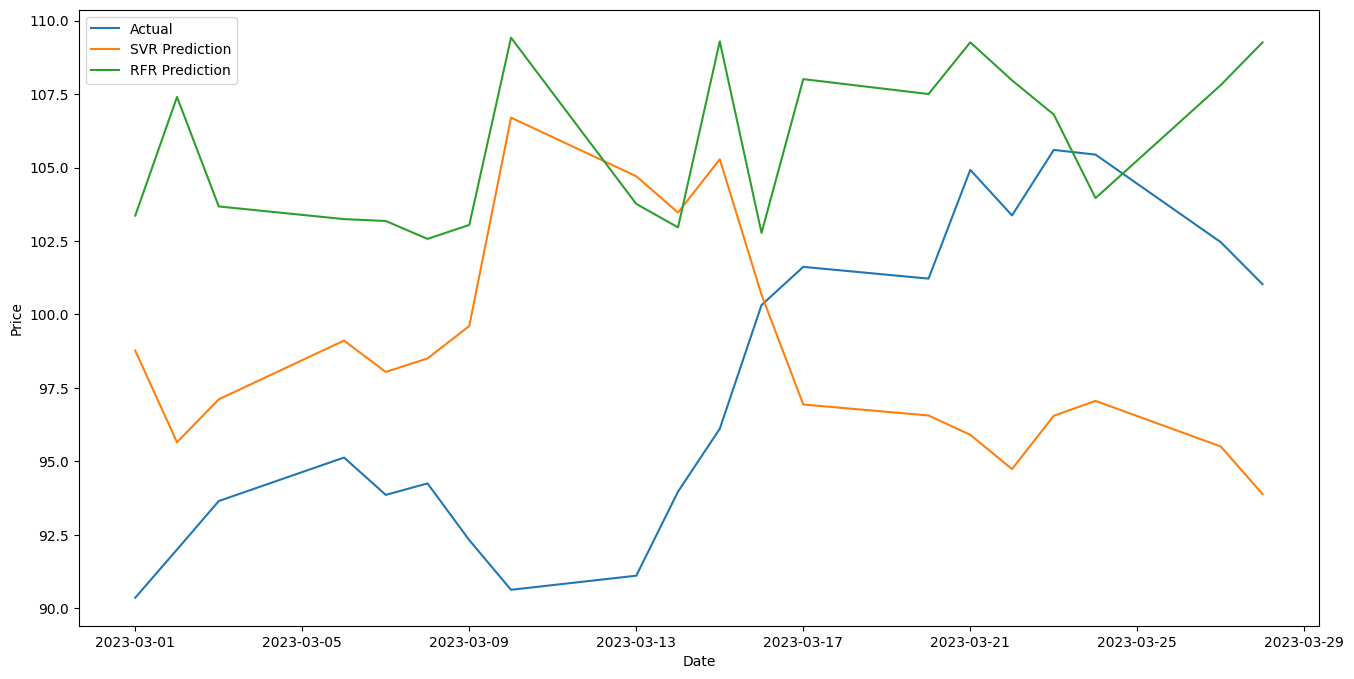

╒═════════╤═══════════════╤════════════════╤════════════════╕
│ Model   │   R² (Actual) │   MSE (Actual) │   MAE (Actual) │
╞═════════╪═══════════════╪════════════════╪════════════════╡
│ SVR     │      -1.31251 │        63.4449 │        7.12126 │
├─────────┼───────────────┼────────────────┼────────────────┤
│ RFR     │      -2.34955 │        91.8967 │        8.44303 │
╘═════════╧═══════════════╧════════════════╧════════════════╛


In [19]:
# Create lists to store the evaluation metrics for each start date
r2_scores = []
mse_scores = []
mae_scores = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame
df = yf.download("GOOGL", start='2016-03-01', end='2023-03-01', progress=False)

# Add technical indicators
df = ta.add_all_ta_features(
    df, "Open", "High", "Low", "Close", "Volume", fillna=True)

# Create a new column for the dependent variable
df['PriceAfterMonth'] = df['Close'].shift(-5)

# Remove rows with missing values
df.dropna(inplace=True)

# Define the independent and dependent variables
X = df[['volume_obv', 'trend_visual_ichimoku_b', 'High', 'trend_ema_slow', 'Low']]
y = df['PriceAfterMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10, shuffle=False)

# Preprocess the data by scaling it
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the PCA model:
pca_model = PCA(n_components=5)

# Fit the PCA model to the training data:
pca_model.fit(X_train)

# Transform the training and test data using the fitted PCA model:
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

# Build SVR model
svr_model = SVR(kernel='linear', C=1000, gamma='auto')
svr_model.fit(X_train_pca, y_train)

# Build RFR model
rfr_model = RandomForestRegressor(n_estimators=500, random_state=10)
rfr_model.fit(X_train_pca, y_train)

# Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
df_actual = yf.download(
    "GOOGL", start='2023-03-01', end='2023-03-29', progress=False)

# Get the last 30 days of historical data
number_of_days = len(df_actual)
last_n_days = df[-number_of_days:]

last_n_days_df = pd.DataFrame(
    last_n_days, columns=X.columns)

X_pred = scaler.transform(last_n_days_df)
X_pred_pca = pca_model.transform(X_pred)

# Make predictions for the next 30 days using the SVR & RFR model
y_svr_pred = svr_model.predict(X_pred_pca)
y_rfr_pred = rfr_model.predict(X_pred_pca)

# Add the predictions to the actual data in a new DataFrame
df_pred = pd.DataFrame({'SVR Prediction': y_svr_pred,
                        'RFR Prediction': y_rfr_pred}, index=df_actual.index)

df_combined = pd.concat([df_actual, df_pred], axis=1)

# Plot the actual price and the predictions
plt.figure(figsize=(16, 8))
plt.plot(df_combined.index, df_combined['Close'], label='Actual')
plt.plot(df_combined.index,
         df_combined['SVR Prediction'], label='SVR Prediction')
plt.plot(df_combined.index,
         df_combined['RFR Prediction'], label='RFR Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate evaluation metrics for SVR model
r2_svr_actual = r2_score(df_combined['Close'], df_combined['SVR Prediction'])
mse_svr_actual = mean_squared_error(
    df_combined['Close'], df_combined['SVR Prediction'])
mae_svr_actual = mean_absolute_error(
    df_combined['Close'], df_combined['SVR Prediction'])

# Calculate evaluation metrics for RFR model
r2_rfr_actual = r2_score(df_combined['Close'], y_rfr_pred)
mse_rfr_actual = mean_squared_error(
    df_combined['Close'], df_combined['RFR Prediction'])
mae_rfr_actual = mean_absolute_error(
    df_combined['Close'], df_combined['RFR Prediction'])

# Create a table to display the evaluation metrics for both SVR and RFR models
table = [["Model", "R² (Actual)", "MSE (Actual)", "MAE (Actual)"],
         ["SVR", r2_svr_actual, mse_svr_actual, mae_svr_actual],
         ["RFR", r2_rfr_actual, mse_rfr_actual, mae_rfr_actual]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


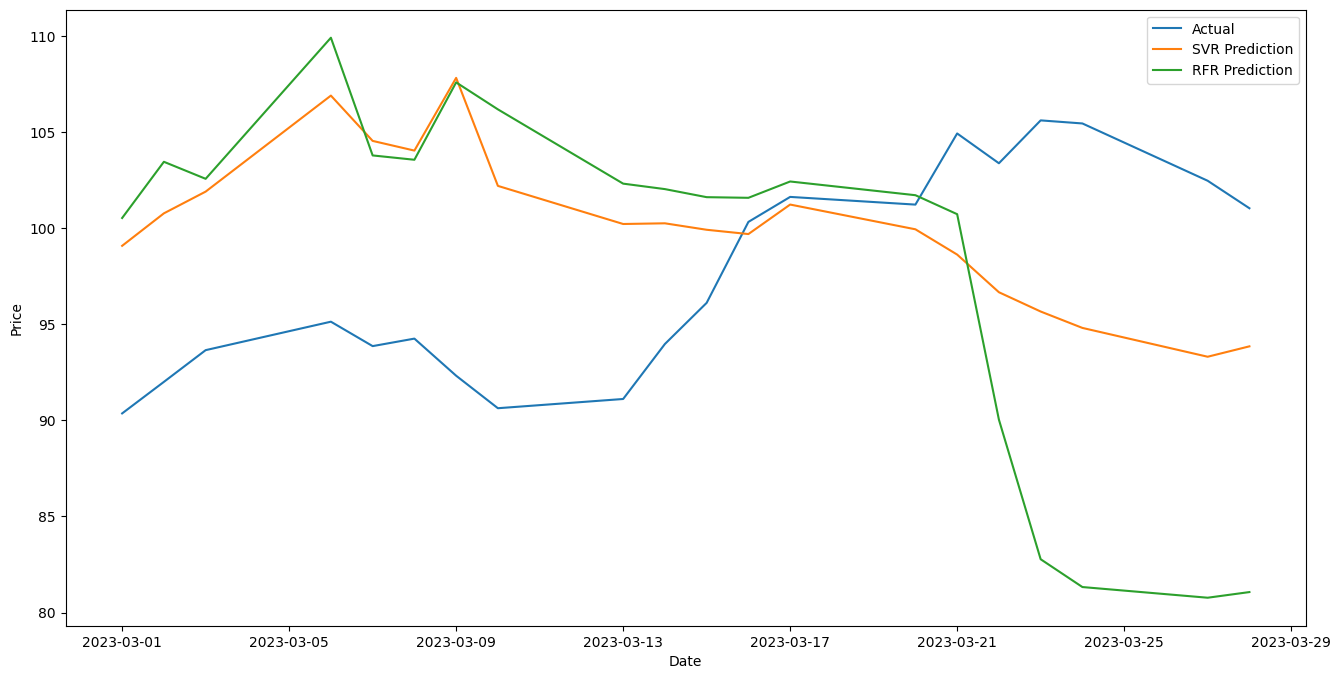

╒═════════╤═══════════════╤════════════════╤════════════════╕
│ Model   │   R² (Actual) │   MSE (Actual) │   MAE (Actual) │
╞═════════╪═══════════════╪════════════════╪════════════════╡
│ SVR     │      -1.75755 │        75.6549 │        7.82011 │
├─────────┼───────────────┼────────────────┼────────────────┤
│ RFR     │      -5.52531 │       179.025  │       11.436   │
╘═════════╧═══════════════╧════════════════╧════════════════╛


In [11]:
# Create lists to store the evaluation metrics for each start date
r2_scores = []
mse_scores = []
mae_scores = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame
df = yf.download("GOOGL", start='2016-03-01', end='2023-03-01', progress=False)

# Add technical indicators
df = ta.add_all_ta_features(
    df, "Open", "High", "Low", "Close", "Volume", fillna=True)

# Create a new column for the dependent variable
df['PriceAfterMonth'] = df['Close'].shift(-1)

# Remove rows with missing values
df.dropna(inplace=True)

# Define the independent and dependent variables
X = df.drop('PriceAfterMonth', axis=1)
y = df['PriceAfterMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30, shuffle=False)

# Preprocess the data by scaling it
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the PCA model:
pca_model = PCA(n_components=10)

# Fit the PCA model to the training data:
pca_model.fit(X_train)

# Transform the training and test data using the fitted PCA model:
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

# Build SVR model
svr_model = SVR(kernel='linear', C=100, gamma='auto')

# Fit the SVR model with a constant term
X_train_with_const = np.c_[X_train_pca, np.ones(X_train_pca.shape[0])]
X_test_with_const = np.c_[X_test_pca, np.ones(X_test_pca.shape[0])]

svr_model.fit(X_train_pca, y_train)

# Build RFR model
rfr_model = RandomForestRegressor(n_estimators=300, random_state=30)
rfr_model.fit(X_train_pca, y_train)

# Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
df_actual = yf.download(
    "GOOGL", start='2023-03-01', end='2023-03-29', progress=False)

# Get the last 30 days of historical data
number_of_days = len(df_actual)
last_n_days = df[-number_of_days:]

last_n_days_df = pd.DataFrame(
    last_n_days, columns=X.columns)

X_pred = scaler.transform(last_n_days_df)
X_pred_pca = pca_model.transform(X_pred)

# Make predictions for the next 30 days using the SVR & RFR model
y_svr_pred = svr_model.predict(X_pred_pca)
y_rfr_pred = rfr_model.predict(X_pred_pca)

# Add the predictions to the actual data in a new DataFrame
df_pred = pd.DataFrame({'SVR Prediction': y_svr_pred,
                        'RFR Prediction': y_rfr_pred}, index=df_actual.index)

df_combined = pd.concat([df_actual, df_pred], axis=1)

# Plot the actual price and the predictions
plt.figure(figsize=(16, 8))
plt.plot(df_combined.index, df_combined['Close'], label='Actual')
plt.plot(df_combined.index,
         df_combined['SVR Prediction'], label='SVR Prediction')
plt.plot(df_combined.index,
         df_combined['RFR Prediction'], label='RFR Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate evaluation metrics for SVR model
r2_svr_actual = r2_score(df_combined['Close'], df_combined['SVR Prediction'])
mse_svr_actual = mean_squared_error(
    df_combined['Close'], df_combined['SVR Prediction'])
mae_svr_actual = mean_absolute_error(
    df_combined['Close'], df_combined['SVR Prediction'])

# Calculate evaluation metrics for RFR model
r2_rfr_actual = r2_score(df_combined['Close'], y_rfr_pred)
mse_rfr_actual = mean_squared_error(
    df_combined['Close'], df_combined['RFR Prediction'])
mae_rfr_actual = mean_absolute_error(
    df_combined['Close'], df_combined['RFR Prediction'])

# Create a table to display the evaluation metrics for both SVR and RFR models
table = [["Model", "R² (Actual)", "MSE (Actual)", "MAE (Actual)"],
         ["SVR", r2_svr_actual, mse_svr_actual, mae_svr_actual],
         ["RFR", r2_rfr_actual, mse_rfr_actual, mae_rfr_actual]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


In [9]:
# Create lists to store the evaluation metrics for each start date
r2_scores = []
mse_scores = []
mae_scores = []

# Download historical price data from Yahoo Finance and store in a pandas DataFrame
df = yf.download("GOOGL", start='2016-03-01', end='2023-03-01', progress=False)

# Add technical indicators
df = ta.add_all_ta_features(
    df, "Open", "High", "Low", "Close", "Volume", fillna=True)

# Create a new column for the dependent variable
df['PriceAfterMonth'] = df['Close'].shift(-1)

# Remove rows with missing values
df.dropna(inplace=True)

# Define the independent and dependent variables
X = df.drop('PriceAfterMonth', axis=1)
y = df['PriceAfterMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30, shuffle=False)

# Preprocess the data by scaling it
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the PCA model:
pca_model = PCA(n_components=10)

# Fit the PCA model to the training data:
pca_model.fit(X_train)

# Transform the training and test data using the fitted PCA model:
X_train_pca = pca_model.transform(X_train)
X_test_pca = pca_model.transform(X_test)

# Apply PolynomialFeatures to the data
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

# Build SVR model
svr_model = SVR(kernel='linear', C=100, gamma='auto')

# Fit the SVR model with a constant term
X_train_with_const = np.c_[X_train_poly, np.ones(X_train_poly.shape[0])]
X_test_with_const = np.c_[X_test_poly, np.ones(X_test_poly.shape[0])]

svr_model.fit(X_train_with_const, y_train)

# Build RFR model
rfr_model = RandomForestRegressor(n_estimators=300, random_state=10)
rfr_model.fit(X_train_poly, y_train)

# Download latest historical price data from Yahoo Finance and store in a pandas DataFrame
df_actual = yf.download(
    "GOOGL", start='2023-03-01', end='2023-03-29', progress=False)

# Get the last 30 days of historical data
number_of_days = len(df_actual)
last_n_days = df[-number_of_days:]

last_n_days_df = pd.DataFrame(
    last_n_days, columns=X.columns)

X_pred = scaler.transform(last_n_days_df)
X_pred_pca = pca_model.transform(X_pred)
X_pred_poly = poly.transform(X_pred_pca)

# Make predictions for the next 30 days using the SVR & RFR model
y_svr_pred = svr_model.predict(X_test_with_const)
y_rfr_pred = rfr_model.predict(X_pred_poly)

# Add the predictions to the actual data in a new DataFrame
df_pred = pd.DataFrame({'SVR Prediction': y_svr_pred,
                        'RFR Prediction': y_rfr_pred}, index=df_actual.index)

df_combined = pd.concat([df_actual, df_pred], axis=1)

# Plot the actual price and the predictions
plt.figure(figsize=(16, 8))
plt.plot(df_combined.index, df_combined['Close'], label='Actual')
plt.plot(df_combined.index,
         df_combined['SVR Prediction'], label='SVR Prediction')
plt.plot(df_combined.index,
         df_combined['RFR Prediction'], label='RFR Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate evaluation metrics for SVR model
r2_svr_actual = r2_score(df_combined['Close'], df_combined['SVR Prediction'])
mse_svr_actual = mean_squared_error(
    df_combined['Close'], df_combined['SVR Prediction'])
mae_svr_actual = mean_absolute_error(
    df_combined['Close'], df_combined['SVR Prediction'])

# Calculate evaluation metrics for RFR model
r2_rfr_actual = r2_score(df_combined['Close'], df_combined['RFR Prediction'])
mse_rfr_actual = mean_squared_error(
    df_combined['Close'], df_combined['RFR Prediction'])
mae_rfr_actual = mean_absolute_error(
    df_combined['Close'], df_combined['RFR Prediction'])

# Create a table to display the evaluation metrics for both SVR and RFR models
table = [["Model", "R² (Actual)", "MSE (Actual)", "MAE (Actual)"],
         ["SVR", r2_svr_actual, mse_svr_actual, mae_svr_actual],
         ["RFR", r2_rfr_actual, mse_rfr_actual, mae_rfr_actual]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))
